Agregamos primero importe de la librerias necesaria, INICIALMENTE REALIZAREMOS UNA VALIDACION DE VARIABLES CON LAS CUALES BUSCAREMOS ENCONTRAR UN VARIABLE OBJETIVO.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re


Unificacion de archivos csv en un dataframe para realizar un analisis completo, asi como validar y unificar titulos y tipos de datos

--- Análisis del DataFrame: car data.csv ---

Primeras filas:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 

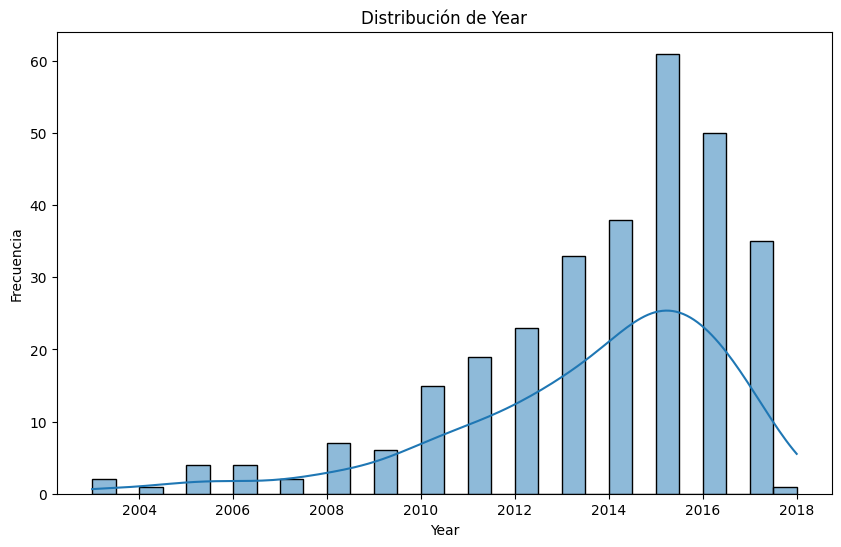

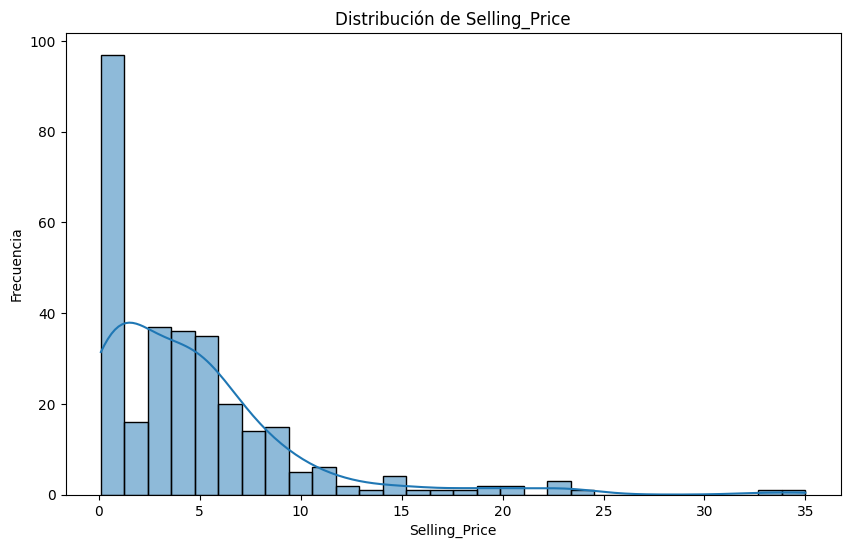

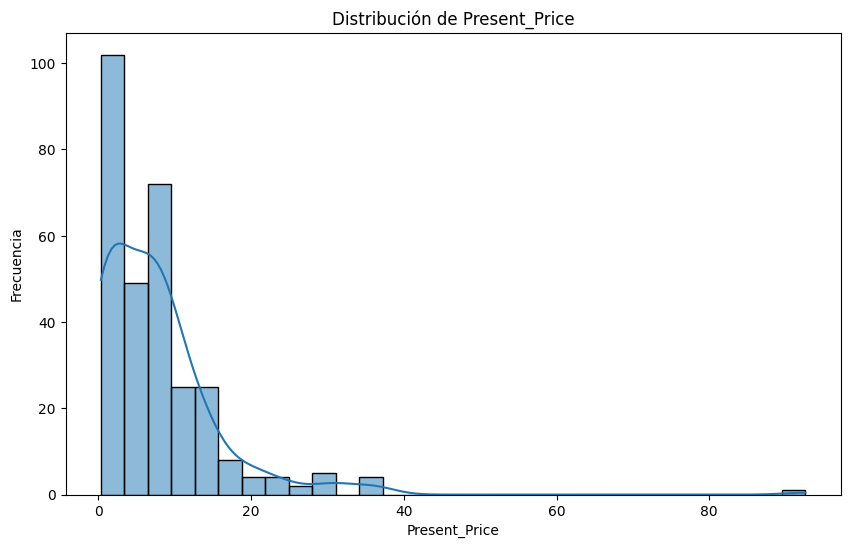

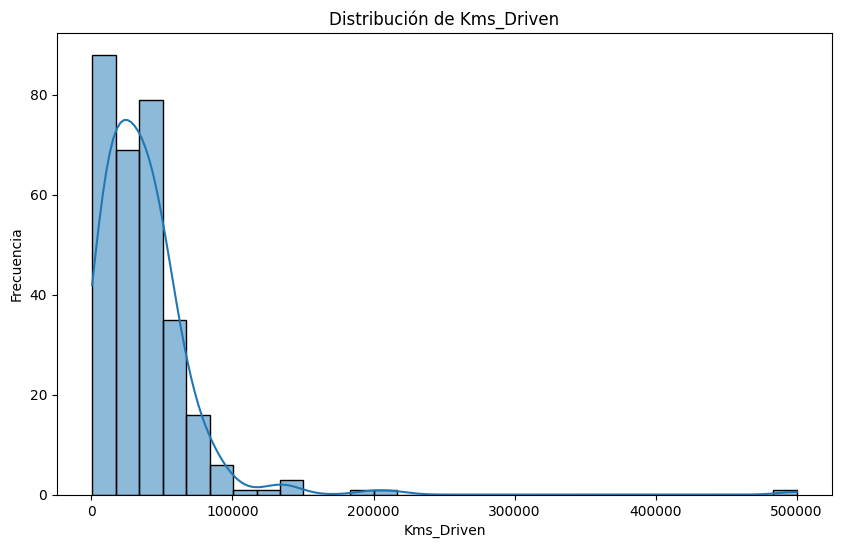

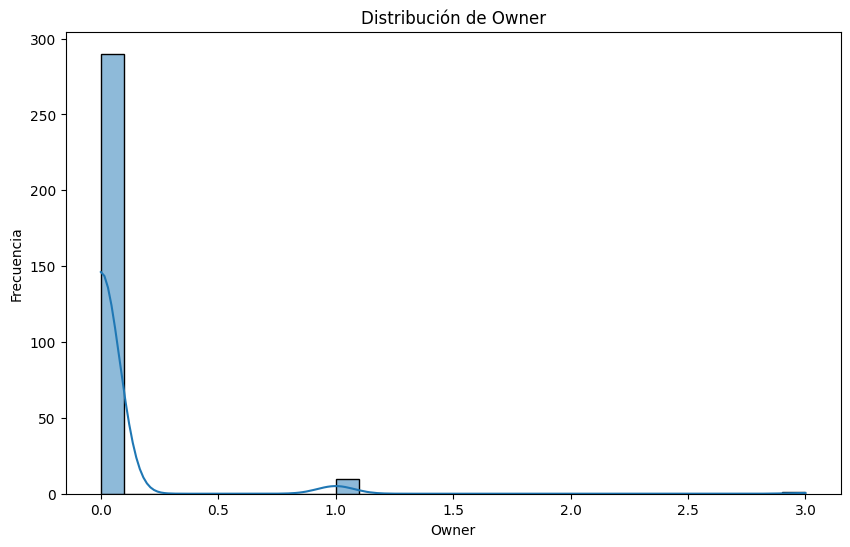

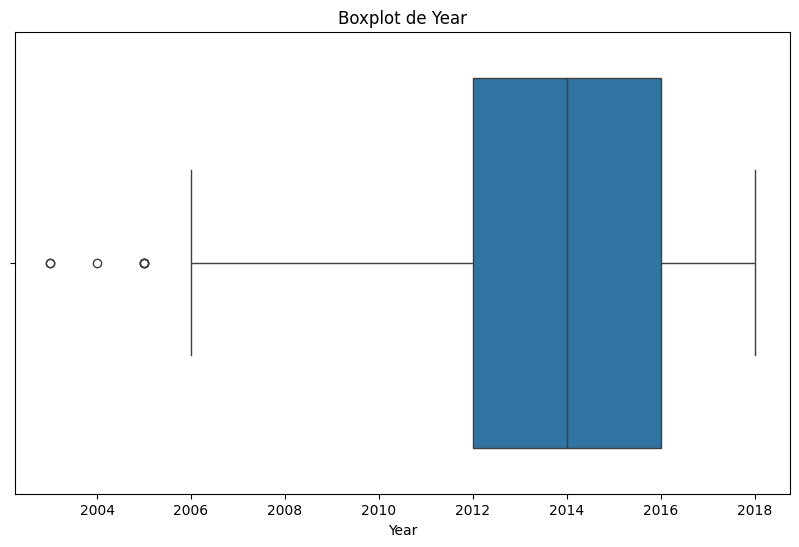

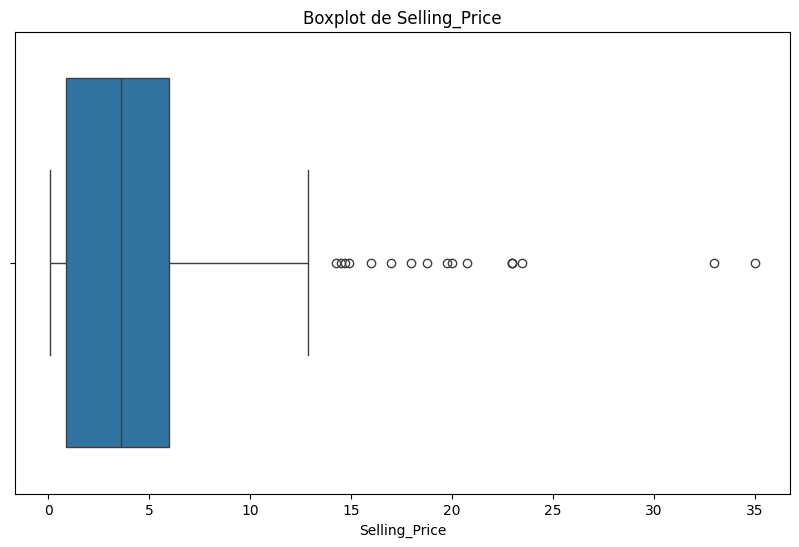

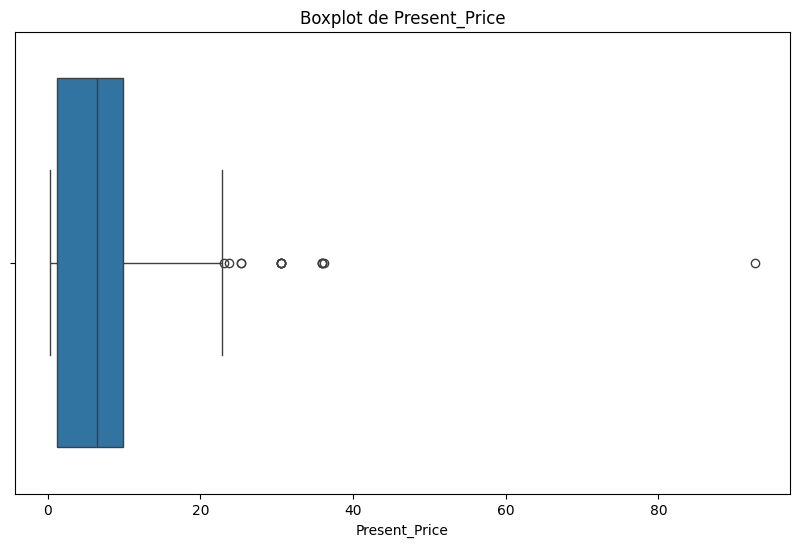

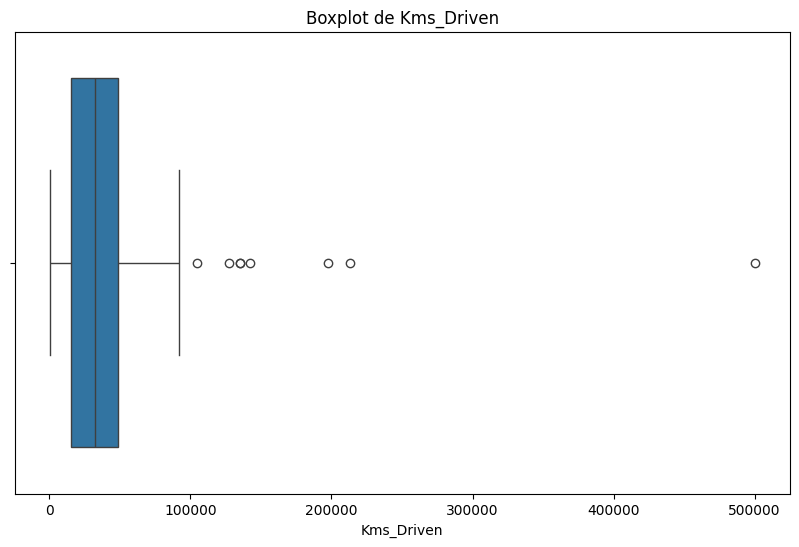

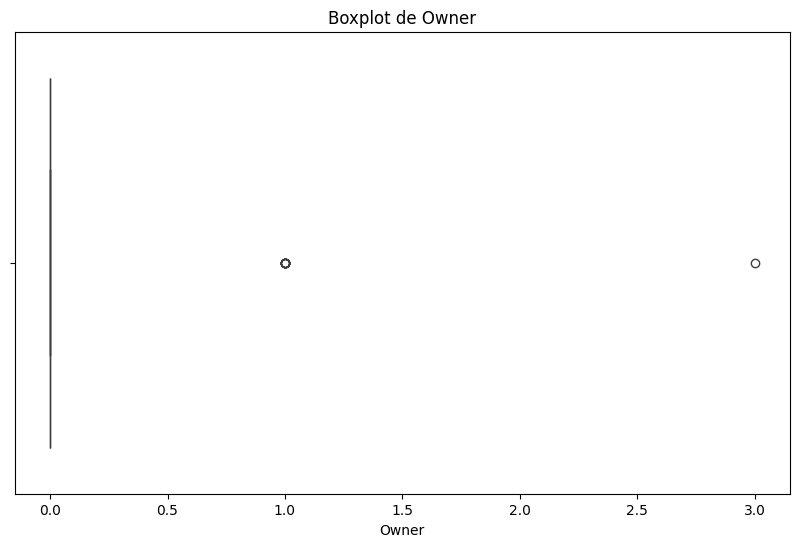

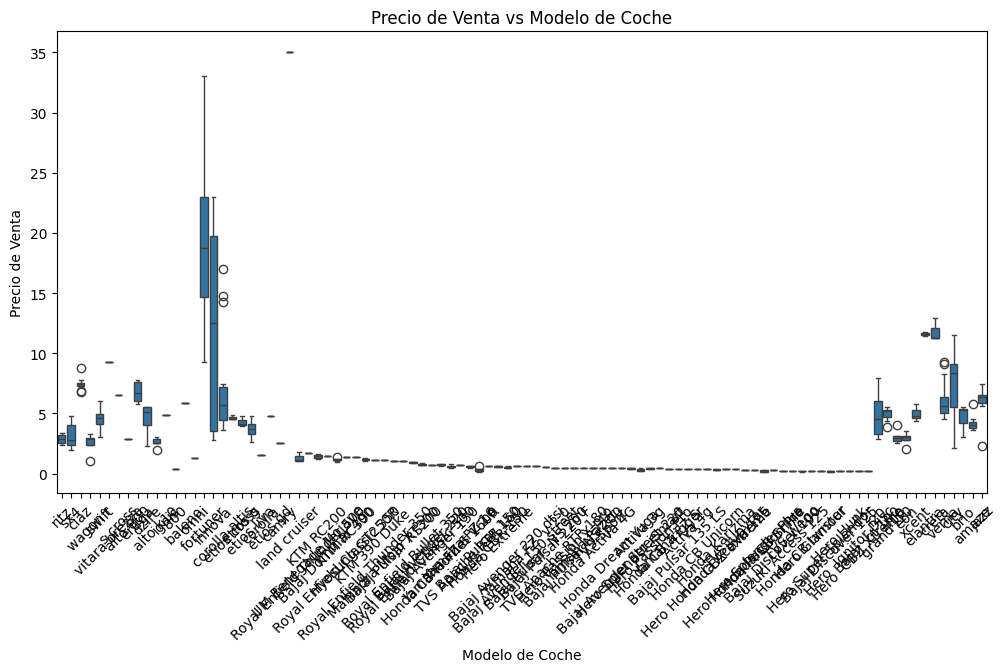

C:\Users\MauricioSalazar\AppData\Local\Temp\ipykernel_9640\3388518593.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car_Name', y='Selling_Price', data=avg_price, palette='viridis')


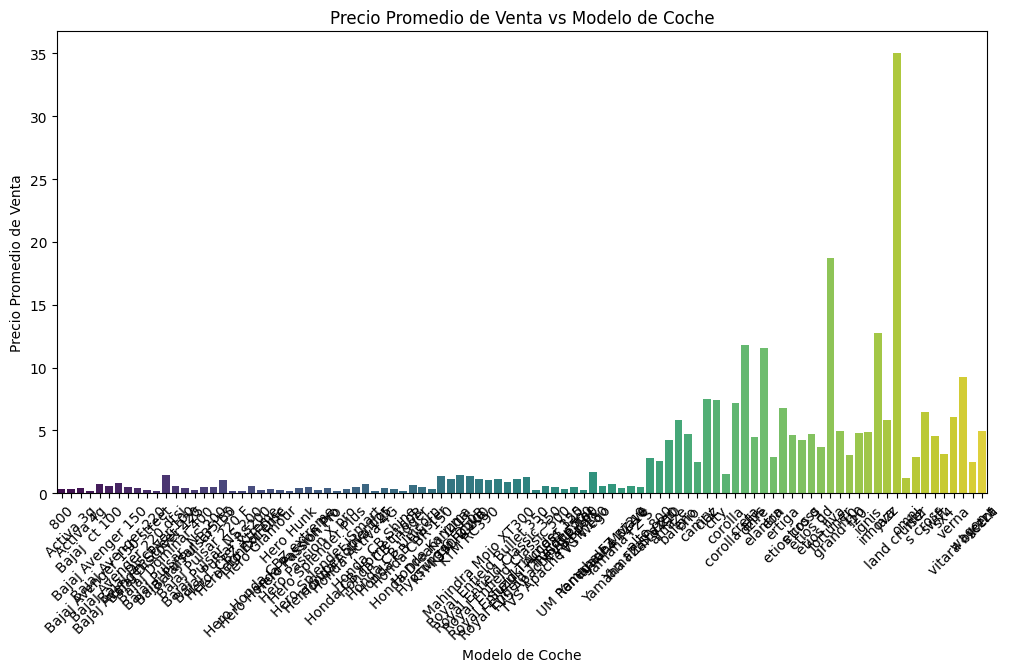

C:\Users\MauricioSalazar\AppData\Local\Temp\ipykernel_9640\3388518593.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Selling_Price', data=avg_price_by_year, palette='viridis')


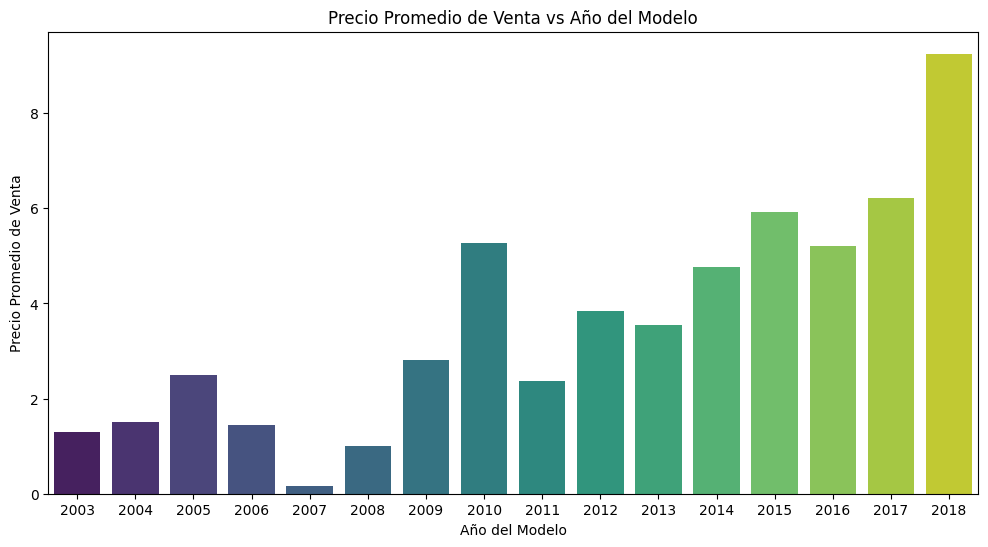

--- Análisis del DataFrame: CAR DETAILS FROM CAR DEKHO.csv ---

Primeras filas:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name     

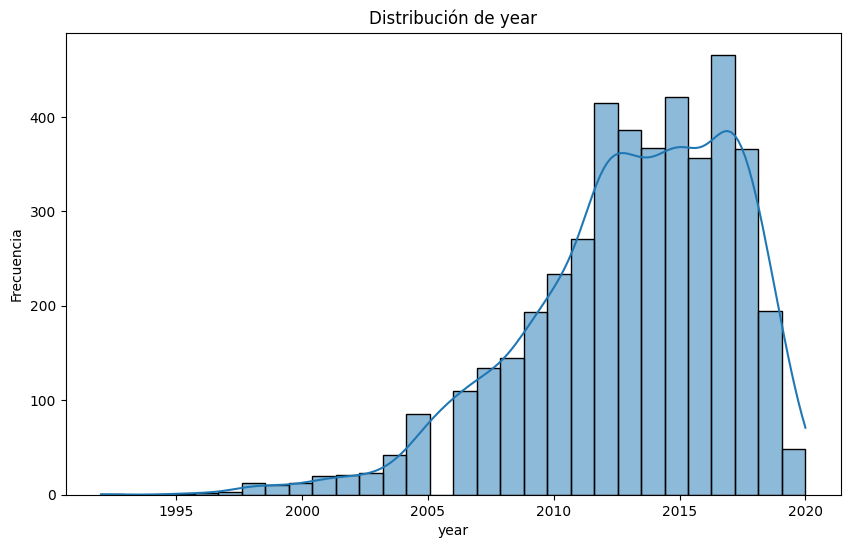

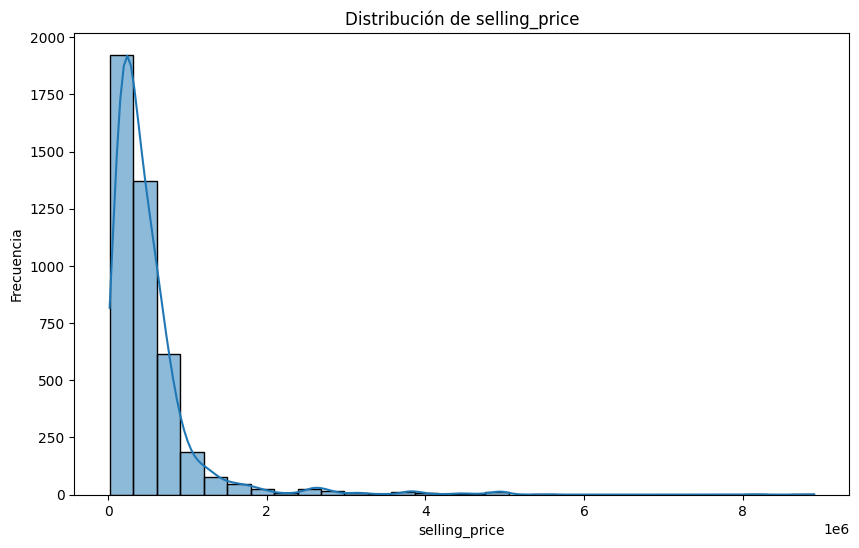

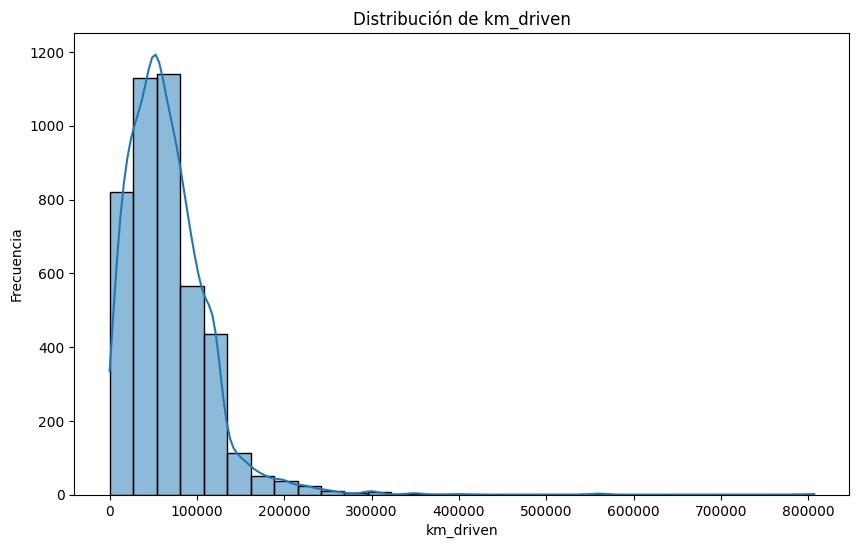

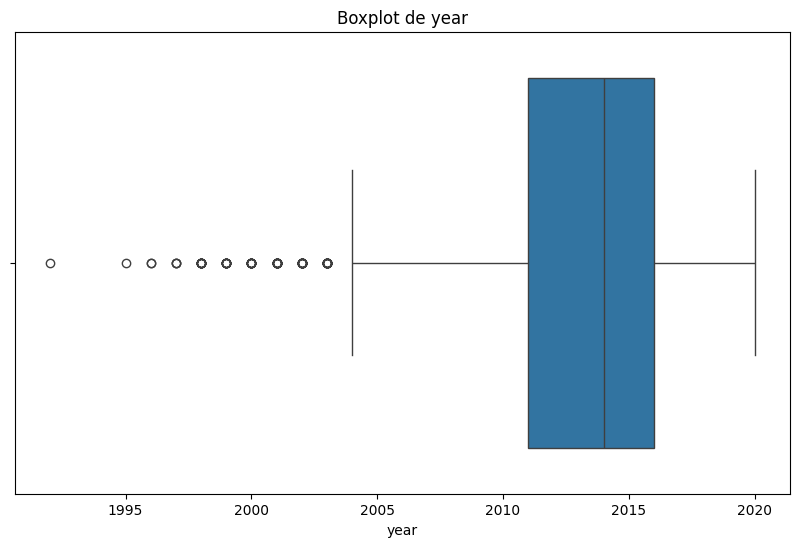

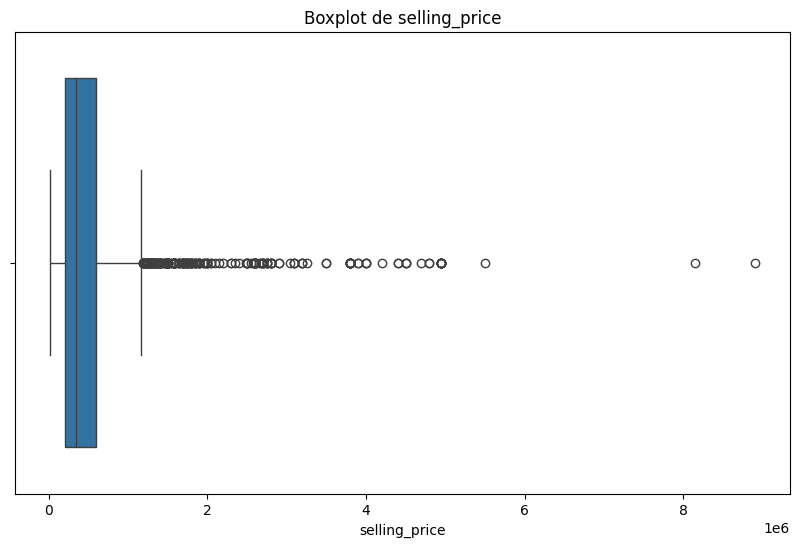

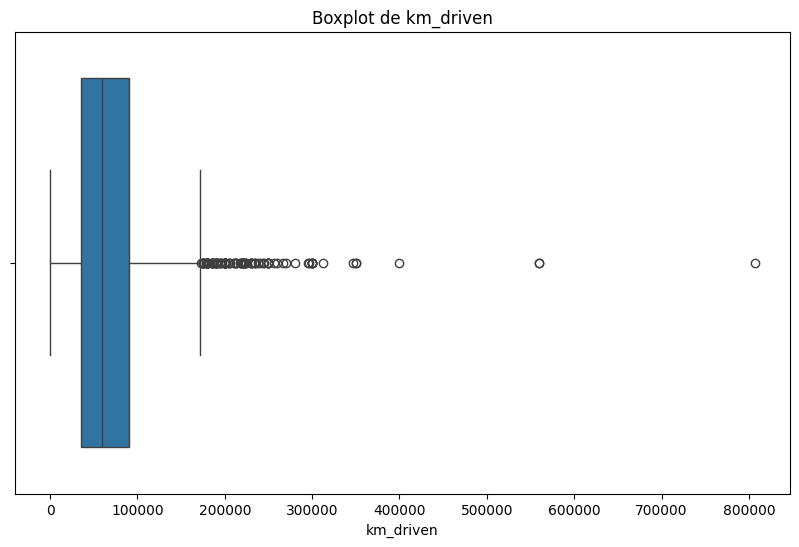

--- Análisis del DataFrame: Car details v3.csv ---

Primeras filas:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                  

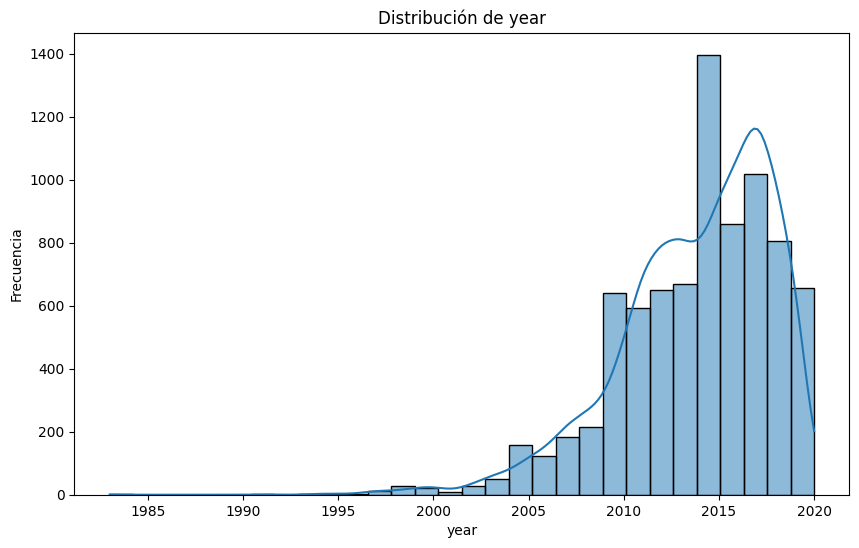

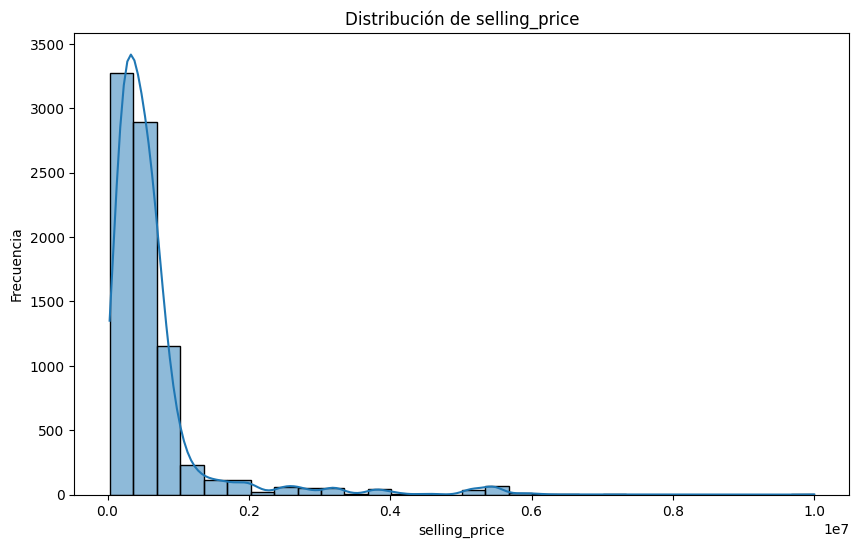

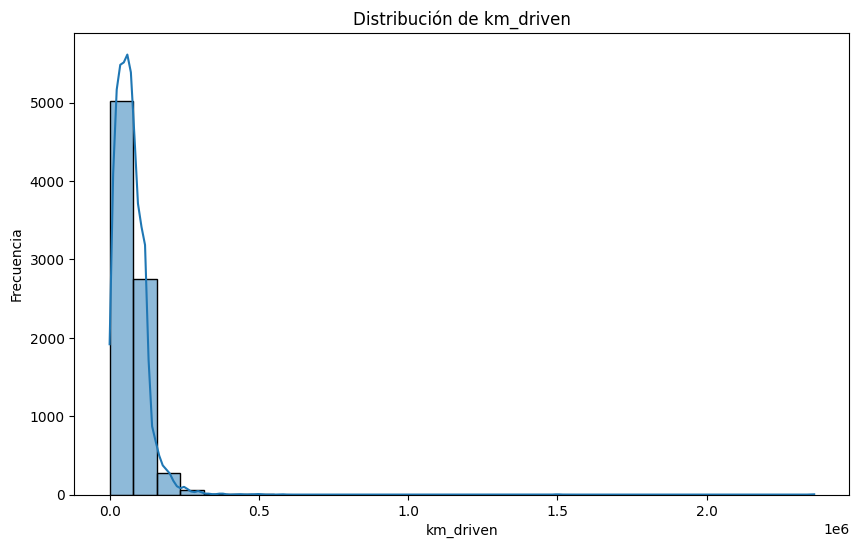

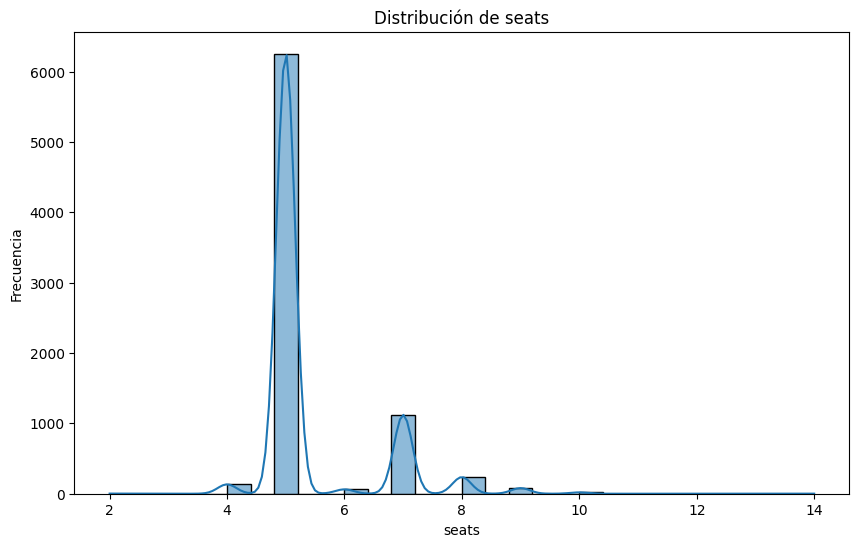

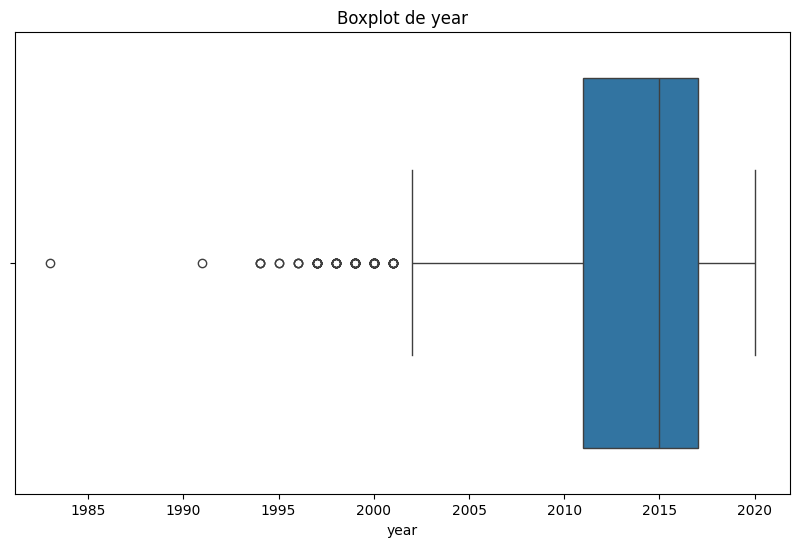

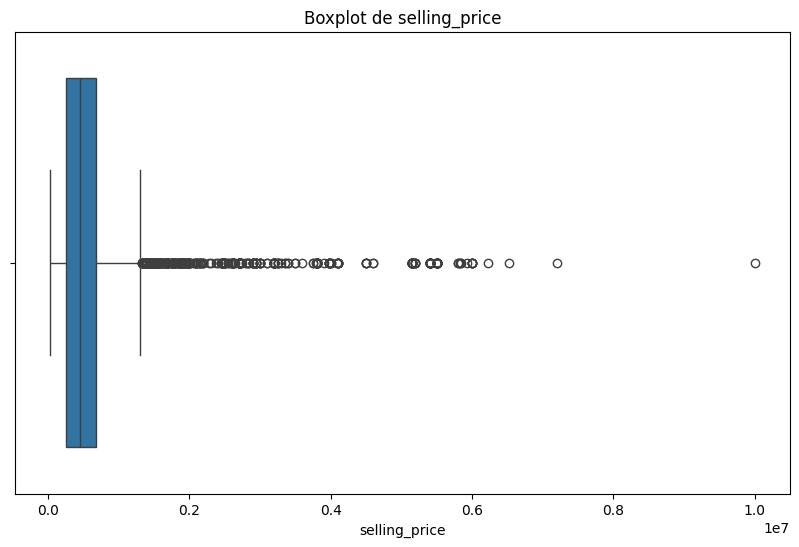

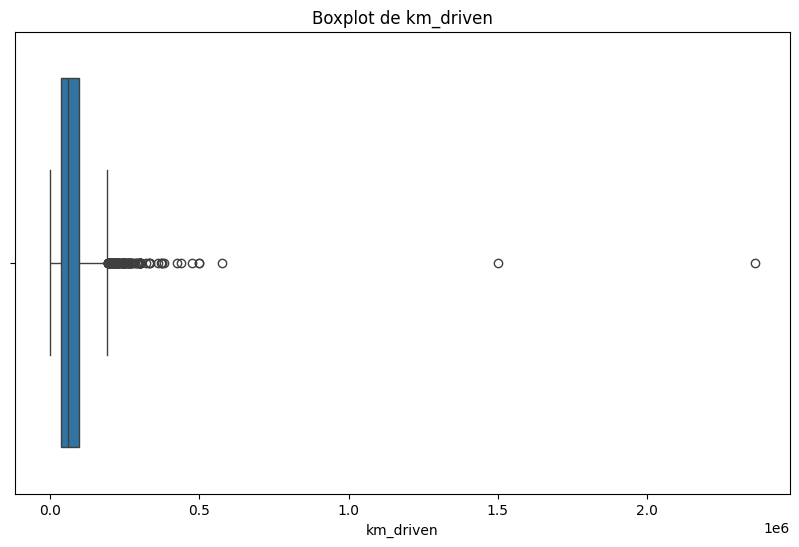

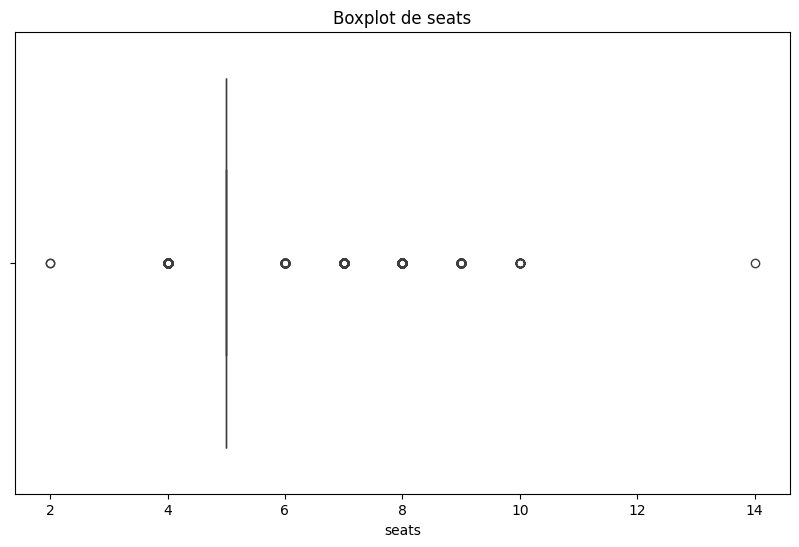

--- Análisis del DataFrame: car details v4.csv ---

Primeras filas:
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   



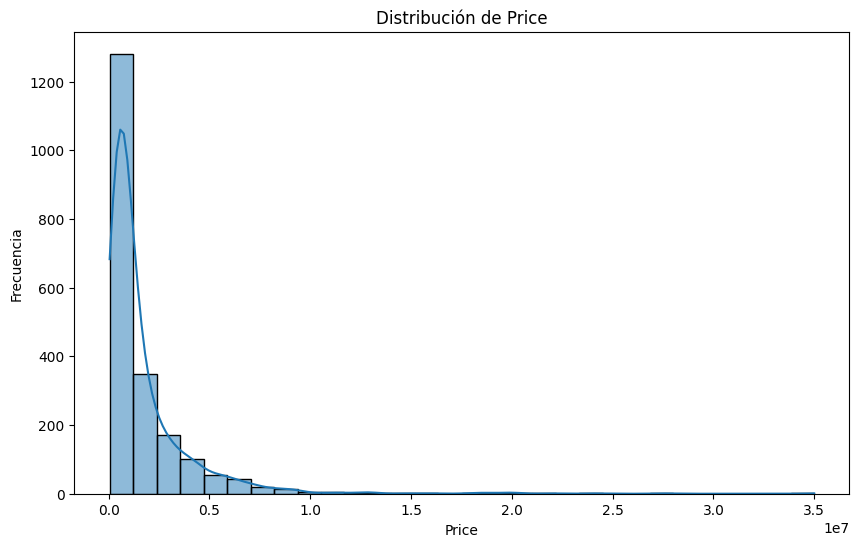

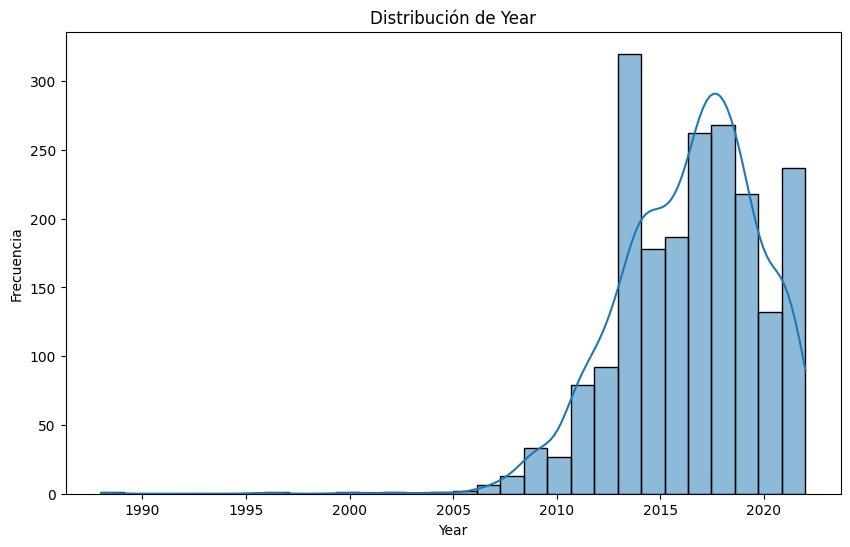

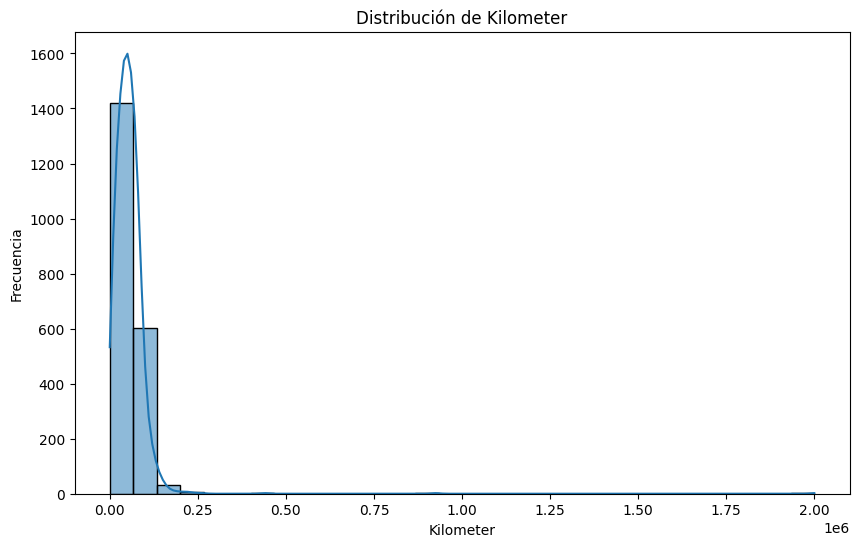

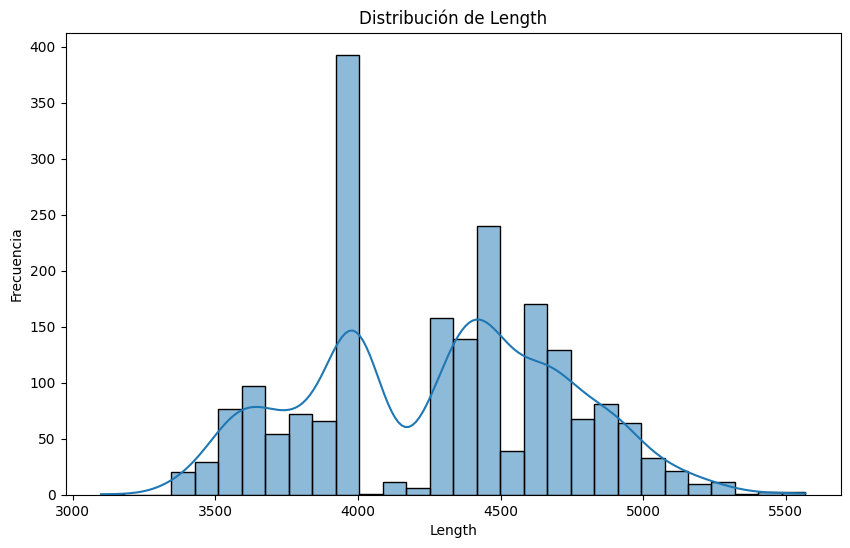

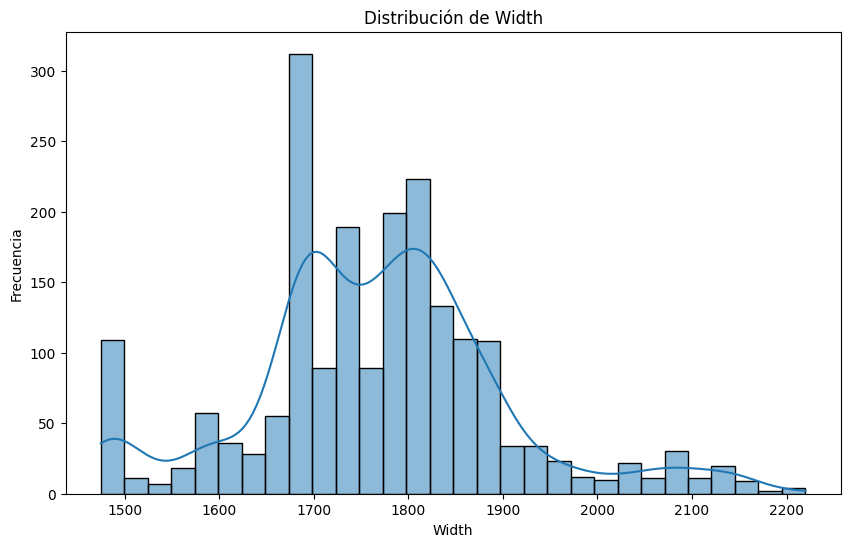

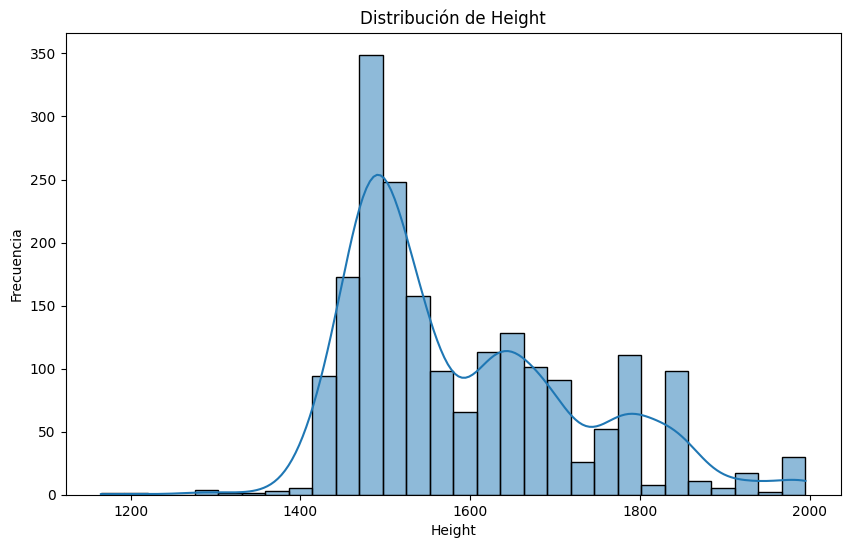

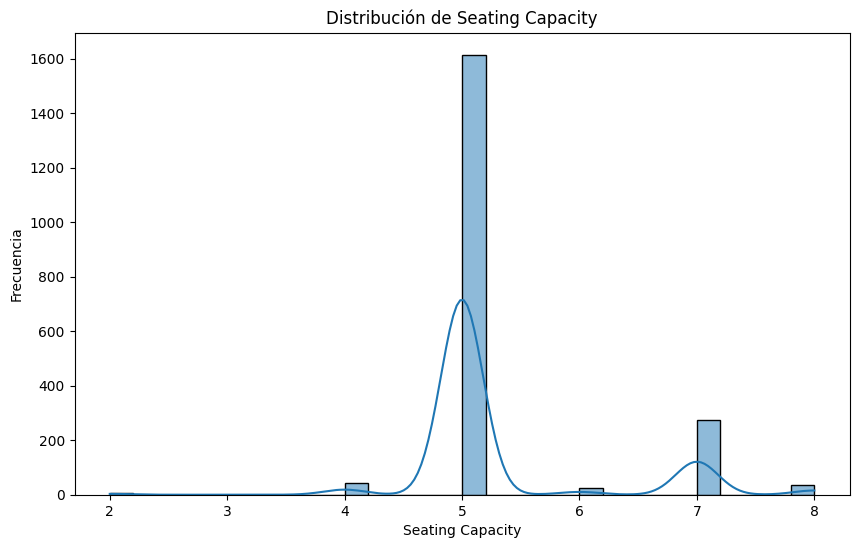

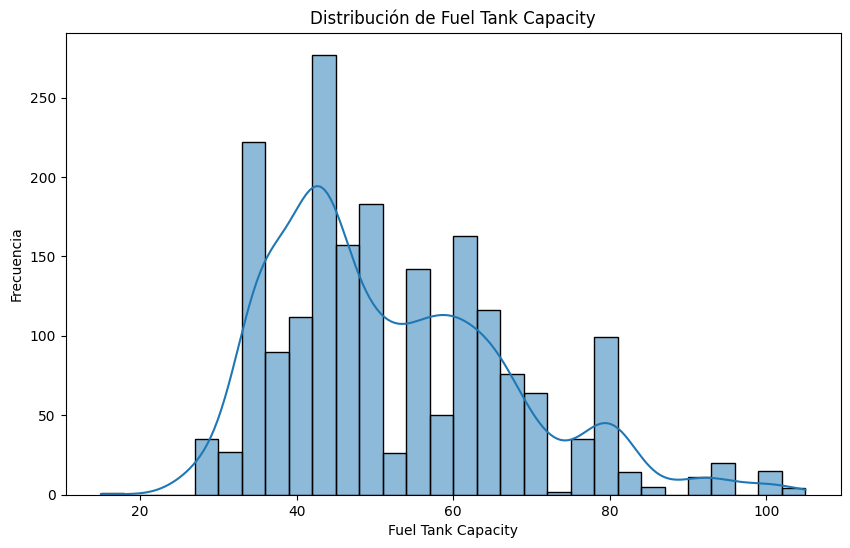

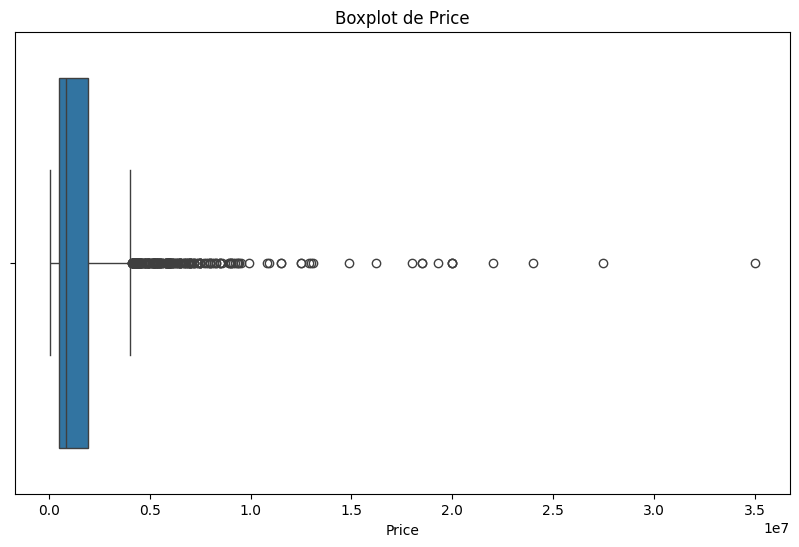

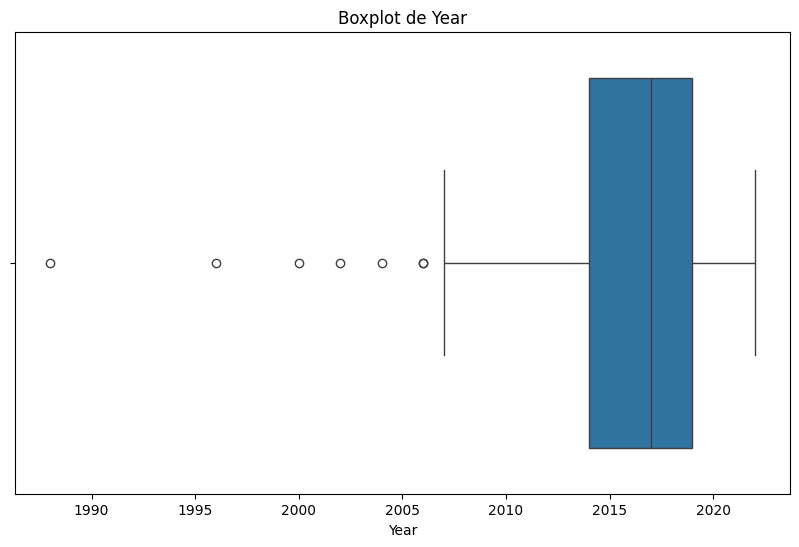

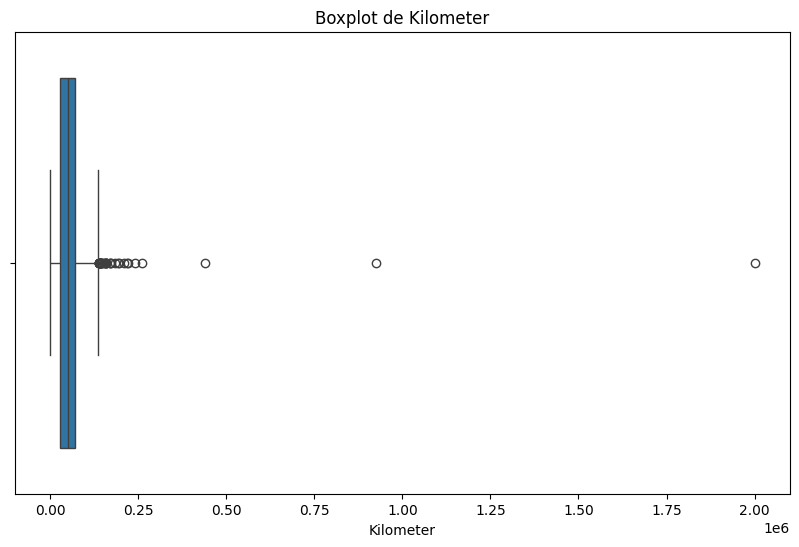

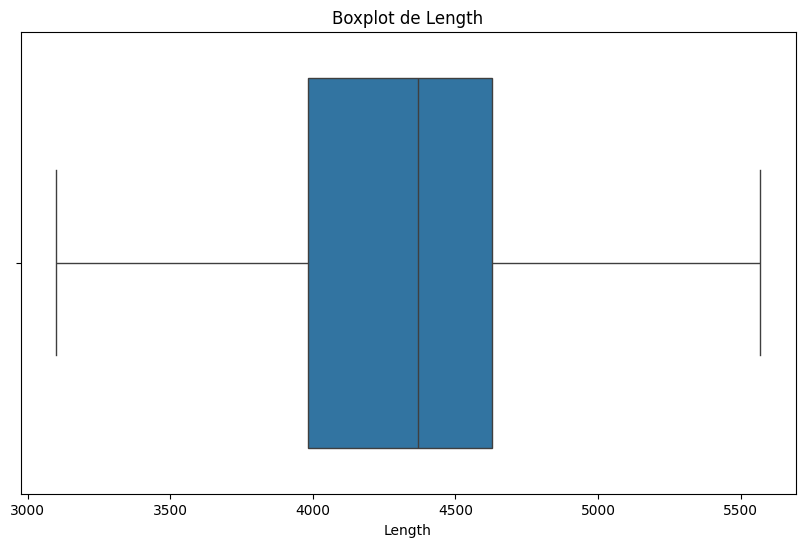

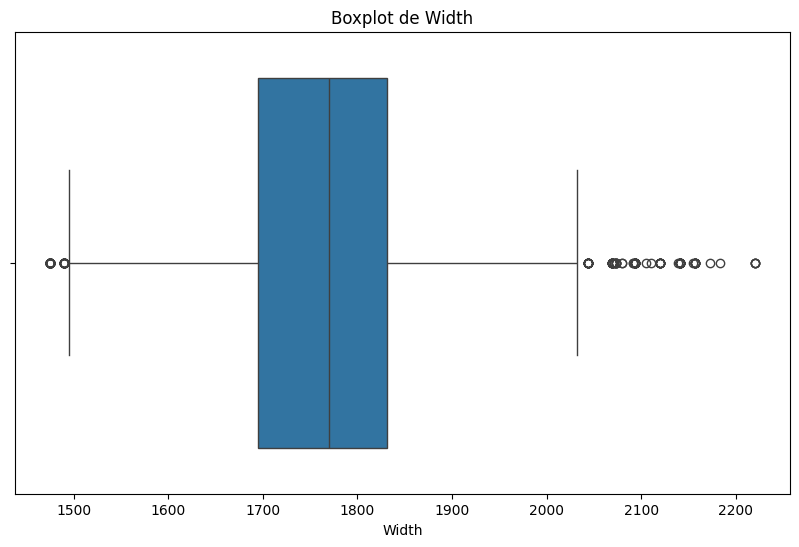

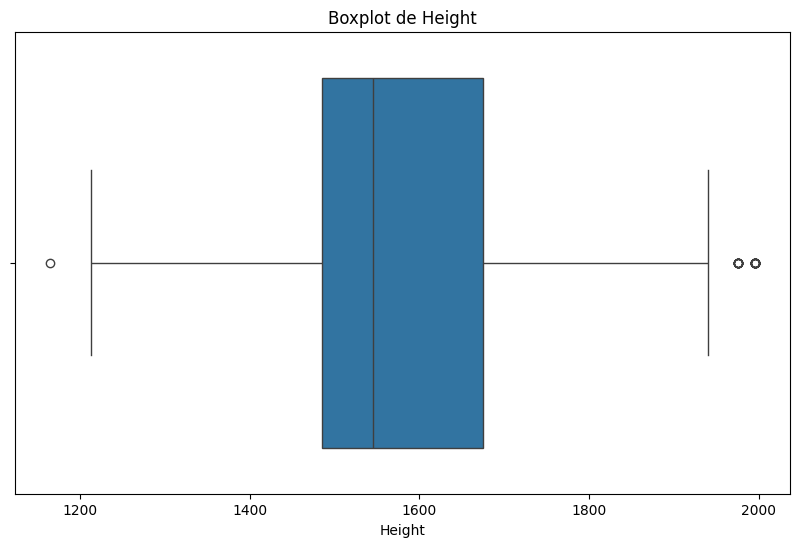

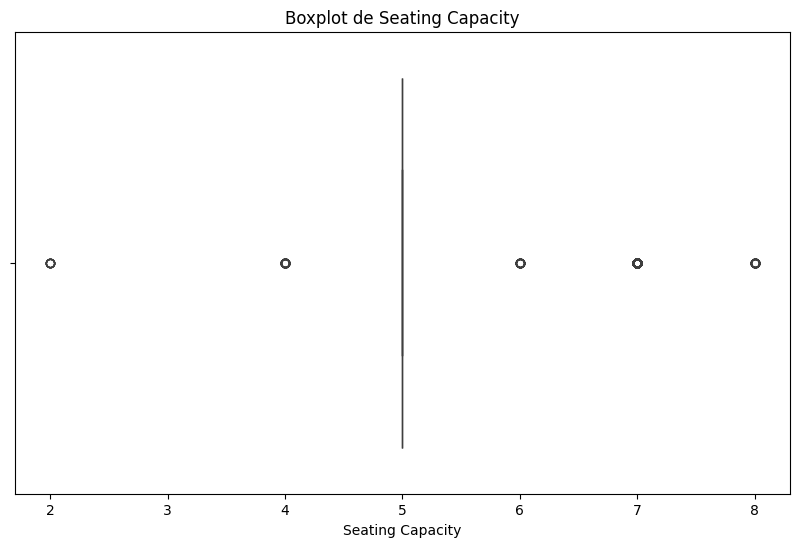

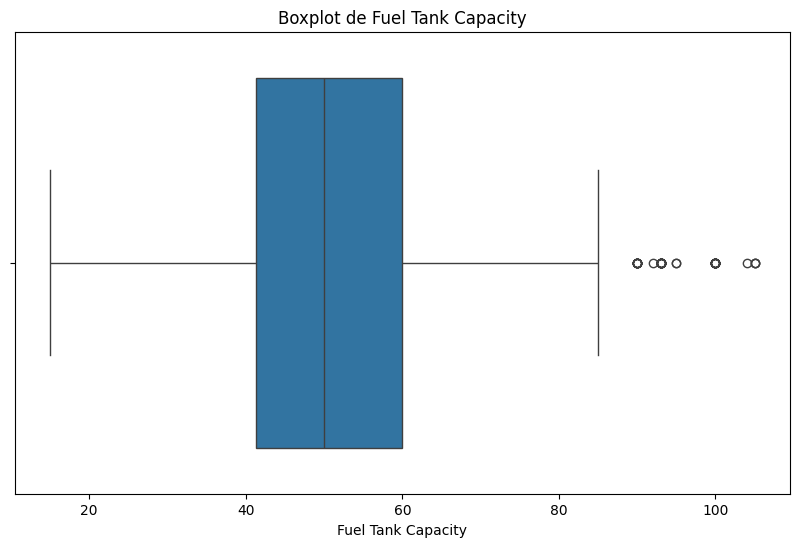

In [3]:
# Función para realizar el análisis exploratorio
def analizar_dataframe(df, nombre):
    print(f"--- Análisis del DataFrame: {nombre} ---\n")
    
    # 1. Mostrar las primeras filas
    print("Primeras filas:")
    print(df.head())
    print("\n")
    
    # 2. Revisar la estructura
    print("Información del DataFrame:")
    print(df.info())
    print("\n")
    
    # 3. Verificar valores nulos
    print("Valores nulos por columna:")
    print(df.isnull().sum())
    print("\n")
    
    # 4. Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    print(df.describe(include='all'))
    print("\n")
    
    # 5. Visualizar la distribución de las variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()
    
    # 6. Identificar valores atípicos
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.show()
    
    # 7. Graficar precio vs modelo utilizando boxplot
    if 'Selling_Price' in df.columns and 'Car_Name' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
        plt.title('Precio de Venta vs Modelo de Coche')
        plt.xticks(rotation=45)
        plt.xlabel('Modelo de Coche')
        plt.ylabel('Precio de Venta')
        plt.show()
    
    # 8. Graficar precio promedio vs modelo utilizando barplot
    if 'Selling_Price' in df.columns:
        plt.figure(figsize=(12, 6))
        avg_price = df.groupby('Car_Name')['Selling_Price'].mean().reset_index()
        sns.barplot(x='Car_Name', y='Selling_Price', data=avg_price, palette='viridis')
        plt.title('Precio Promedio de Venta vs Modelo de Coche')
        plt.xticks(rotation=45)
        plt.xlabel('Modelo de Coche')
        plt.ylabel('Precio Promedio de Venta')
        plt.show()
    
    # 9. Graficar precio promedio vs año utilizando barplot
    if 'Year' in df.columns and 'Selling_Price' in df.columns:
        plt.figure(figsize=(12, 6))
        avg_price_by_year = df.groupby('Year')['Selling_Price'].mean().reset_index()
        sns.barplot(x='Year', y='Selling_Price', data=avg_price_by_year, palette='viridis')
        plt.title('Precio Promedio de Venta vs Año del Modelo')
        plt.xlabel('Año del Modelo')
        plt.ylabel('Precio Promedio de Venta')
        plt.show()

# Cargar los archivos
df1 = pd.read_csv("Data\\car data.csv")
df2 = pd.read_csv("Data\\CAR DETAILS FROM CAR DEKHO.csv")
df3 = pd.read_csv("Data\\Car details v3.csv")
df4 = pd.read_csv("Data\\car details v4.csv")

# Analizar cada DataFrame
analizar_dataframe(df1, "car data.csv")
analizar_dataframe(df2, "CAR DETAILS FROM CAR DEKHO.csv")
analizar_dataframe(df3, "Car details v3.csv")
analizar_dataframe(df4, "car details v4.csv")


Validacion de valores nulos y estadisticas

In [4]:
# Verificar valores nulos y estadísticas
def verificar_nulos_y_estadisticas(df):
    print("Valores nulos por columna:")
    print(df.isnull().sum())
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))
    print("\n")

# Añadir esta línea en cada análisis individual
verificar_nulos_y_estadisticas(df1)
verificar_nulos_y_estadisticas(df2)
verificar_nulos_y_estadisticas(df3)
verificar_nulos_y_estadisticas(df4)

Valores nulos por columna:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Estadísticas descriptivas:
       Car_Name         Year  Selling_Price  Present_Price     Kms_Driven  \
count       301   301.000000     301.000000     301.000000     301.000000   
unique       98          NaN            NaN            NaN            NaN   
top        city          NaN            NaN            NaN            NaN   
freq         26          NaN            NaN            NaN            NaN   
mean        NaN  2013.627907       4.661296       7.628472   36947.205980   
std         NaN     2.891554       5.082812       8.644115   38886.883882   
min         NaN  2003.000000       0.100000       0.320000     500.000000   
25%         NaN  2012.000000       0.900000       1.200000   15000.000000   
50%         NaN  2014.000000       3.600000       6.400000   32000.0

Identificando lo anterior se encuentra que el precio de venta es una variable util como variable objetivo para su analisis y prediccion y creacion del modelo de regresion lineal

In [5]:
# Cargar el archivo CSV
try:
    df = pd.read_csv("Data\\car details v4.csv", delimiter=',', quotechar='"')
    print(f"Forma del DataFrame: {df.shape}")
except Exception as e:
    print(f"Ocurrió un error al importar el archivo: {e}")
# Mostrar las primeras filas
print(df.info())
print("\n")

Forma del DataFrame: (2059, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              199

Con el comando anterior se valida el tipo de variables con el que trabajamos, Se realiza una validacion a continuacion con la descripcion estadistica de sus variables, percentiles meadia y demas.

In [6]:
print("Descripcion del dataframe seleccionado" "\n")
print(df.describe())

Descripcion del dataframe seleccionado

              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000   

Se valida los valores Nulos para identificar si las variables a usar se encuentran comprometidas y requieren ajustes a nivel de eliminarlos o normarlizarlos segun el caso.

In [7]:
# Contar valores nulos por columna
print(df.isnull().sum())
print(df['Max Torque'])


Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64
0            109 Nm @ 4500 rpm
1            190 Nm @ 2000 rpm
2       112.7619 Nm @ 4000 rpm
3            113 Nm @ 4200 rpm
4            343 Nm @ 1400 rpm
                 ...          
2054         330 Nm @ 1600 rpm
2055          75 Nm @ 4000 rpm
2056         102 Nm @ 4000 rpm
2057         400 Nm @ 1750 rpm
2058         195 Nm @ 1400 rpm
Name: Max Torque, Length: 2059, dtype: object


Limpieza y Preprocesamiento de Datos en las columnas clave para el ejercicio de regresion lineal, es decir las variables que vamos a usar como dependiente e independientes.

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas:", numeric_columns)

Columnas numéricas: ['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


In [9]:
# Validar y rellenar valores nulos en columnas numéricas con la media
for column in numeric_columns:
    if df[column].isnull().any():
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
        print(f'Valores nulos en {column} reemplazados con la media: {mean_value}')

Valores nulos en Length reemplazados con la media: 4280.860651629073
Valores nulos en Width reemplazados con la media: 1767.9919799498746
Valores nulos en Height reemplazados con la media: 1591.7353383458646
Valores nulos en Seating Capacity reemplazados con la media: 5.306265664160401
Valores nulos en Fuel Tank Capacity reemplazados con la media: 52.00220966084276


C:\Users\MauricioSalazar\AppData\Local\Temp\ipykernel_9640\1584124077.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


In [10]:
# 4. Separar Variables Independientes y Dependientes
# Suponemos que 'Price' es nuestra variable objetivo
X = df[numeric_columns].drop('Price', axis=1)
y = df['Price']

In [11]:
# 5. Dividir el Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 6. Entrenar el Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# 7. Hacer Predicciones
y_pred = model.predict(X_test)

In [14]:
# 8. Evaluar el Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4163364440129.615
R-squared: 0.4040658067620446


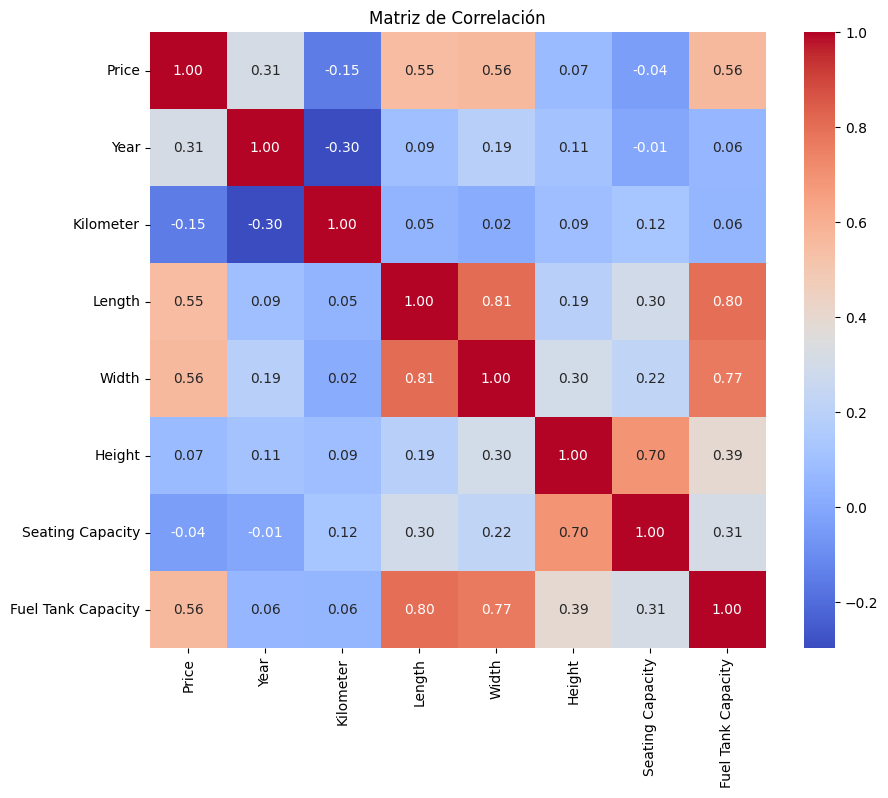

In [15]:
# Calculando la matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

In [16]:
#Obtener los coeficientes
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
coefficients['Impacto'] = coefficients['Coeficiente'].abs() / coefficients['Coeficiente'].abs().sum()
print(coefficients.sort_values(by='Impacto', ascending=False))

                      Coeficiente   Impacto
Seating Capacity   -722478.362020  0.769965
Year                155986.884483  0.166240
Fuel Tank Capacity   56200.116509  0.059894
Length                1462.088842  0.001558
Width                 1404.308370  0.001497
Height                 790.397549  0.000842
Kilometer               -3.802265  0.000004


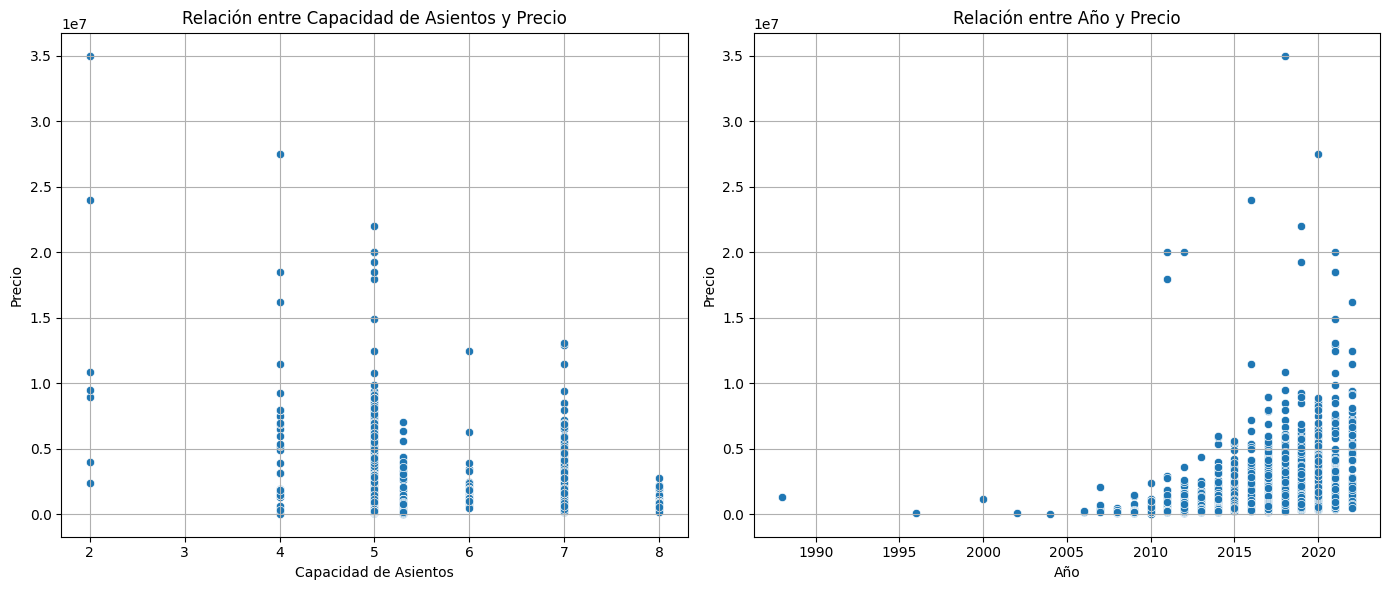

In [17]:
# Definir la figura y los ejes
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para Seating Capacity vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Seating Capacity', y='Price')
plt.title('Relación entre Capacidad de Asientos y Precio')
plt.xlabel('Capacidad de Asientos')
plt.ylabel('Precio')
plt.grid(True)

# Gráfico de dispersión para Year vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Year', y='Price')
plt.title('Relación entre Año y Precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

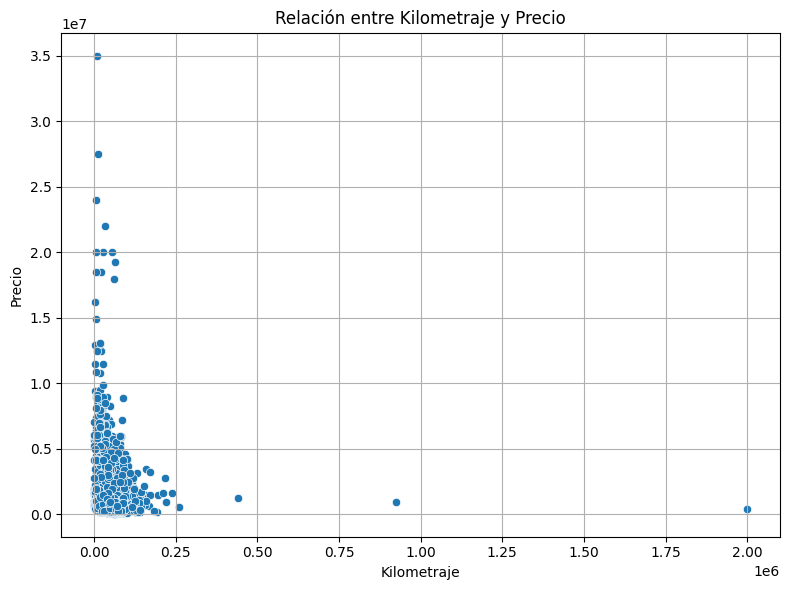

In [18]:
plt.figure(figsize=(8, 6))

# Gráfico de dispersión para Kilometraje vs Precio
sns.scatterplot(data=df, x='Kilometer', y='Price')
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [23]:
print(df)

               Make                                  Model    Price  Year  \
0             Honda                    Amaze 1.2 VX i-VTEC   505000  2017   
1     Maruti Suzuki                        Swift DZire VDI   450000  2014   
2           Hyundai                   i10 Magna 1.2 Kappa2   220000  2011   
3            Toyota                               Glanza G   799000  2019   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]  1950000  2018   
...             ...                                    ...      ...   ...   
2054       Mahindra                  XUV500 W8 [2015-2017]   850000  2016   
2055        Hyundai                           Eon D-Lite +   275000  2014   
2056           Ford            Figo Duratec Petrol ZXI 1.2   240000  2013   
2057            BMW  5-Series 520d Luxury Line [2017-2019]  4290000  2018   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]   670000  2017   

      Kilometer Fuel Type Transmission    Location   Color   Owner  \
0    

Se encuentra baja correlacion entre las variable numericas y la variable objetivo por lo que el modelo con la regresion lineal puede requerir de variables categoricas para poder tener una prediccion mas acertada de la variable objetivo precio.

Tendencia positiva de Año vs Precio donde el precio tiende a aumentar con el año del modelo, lo que es lógico en el contexto del mercado de vehículos.

Como conclusion y breve resumen de el analisis basado en regresion lineal tambien podemos inferir lo siguiente:

Precio vs Año: Con la regresión lineal, investigamos cómo cambia el precio de los vehículos a medida que envejecen. 
Precio vs Kilometraje: Observamos si los vehículos con mayor kilometraje tienden a tener precios menores.
Precio vs Potencia máxima (Max Power): Evidenciamos si los vehículos con mayor potencia pueden tener precios más altos. Requiere la categorizacion de la variable dado que no viene ilustrada optimamente


In [32]:
import pandas as pd
import re

# Suponiendo que el dataset se llama df y contiene la columna "Max Power"
# Extraemos solo el número de BHP antes del "@" y lo convertimos en tipo float
df['BHP'] = df['Max Power'].apply(lambda x: float(re.search(r'(\d+(\.\d+)?)', x).group(1)) if pd.notnull(x) and re.search(r'(\d+(\.\d+)?)', x) else None)
df['BHP'] = df['BHP'].fillna(0)
print(df['BHP'])

0        87.0
1        74.0
2        79.0
3        82.0
4       148.0
        ...  
2054    138.0
2055     55.0
2056     70.0
2057    188.0
2058     70.0
Name: BHP, Length: 2059, dtype: float64


Ahora vamos a categorizar la fuerza de los vehiculos "bhp" para analizar su correlacion

In [36]:
# Calcular los percentiles para los bins
bins = [0] + [df['BHP'].quantile(q) for q in [0.25, 0.5, 0.75, 1.0]]
labels = ['Baja', 'Media', 'Alta', 'Muy Alta']

# Aplicar los bins
df['Power Category'] = pd.cut(df['BHP'], bins=bins, labels=labels, include_lowest=True)
print(df['Power Category'])
print(df['Price'])

0          Media
1           Baja
2           Baja
3           Baja
4           Alta
          ...   
2054        Alta
2055        Baja
2056        Baja
2057    Muy Alta
2058        Baja
Name: Power Category, Length: 2059, dtype: category
Categories (4, object): ['Baja' < 'Media' < 'Alta' < 'Muy Alta']
0        505000
1        450000
2        220000
3        799000
4       1950000
         ...   
2054     850000
2055     275000
2056     240000
2057    4290000
2058     670000
Name: Price, Length: 2059, dtype: int64


In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Supongamos que df es tu DataFrame y contiene las columnas 'BHP' y 'Price'
X = df[['BHP']]  # Seleccionamos 'BHP' como DataFrame con doble corchete
y = df['Price']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
score = model.score(X_test, y_test)
print("Score:", score)


Score: 0.5908142781867739


C:\Users\MauricioSalazar\AppData\Local\Temp\ipykernel_9640\4283149283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_power_category = df.groupby('Power Category')['Price'].mean().reset_index()
C:\Users\MauricioSalazar\AppData\Local\Temp\ipykernel_9640\4283149283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Power Category', y='Price', data=price_by_power_category, palette='viridis')


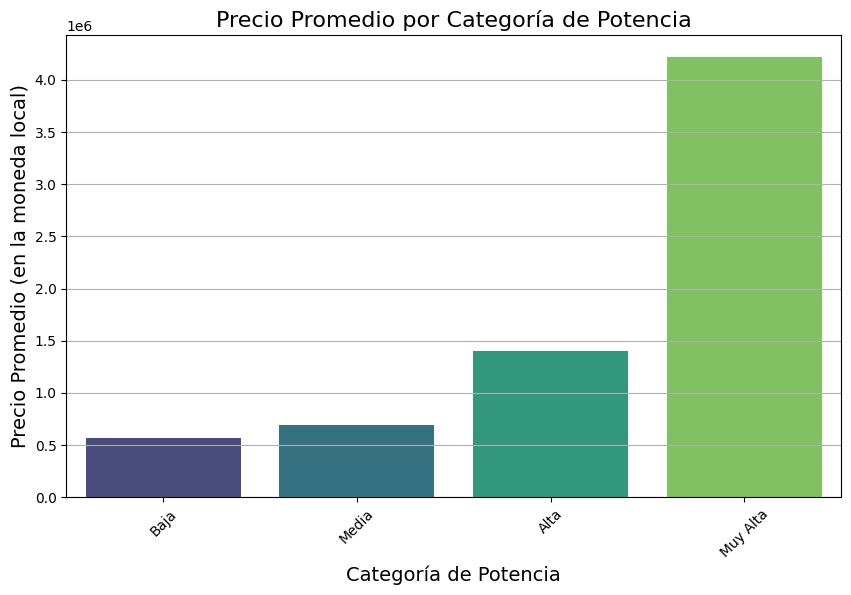

In [39]:
#Calcular el precio promedio por categoría de potencia
price_by_power_category = df.groupby('Power Category')['Price'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Power Category', y='Price', data=price_by_power_category, palette='viridis')

# Configurar el gráfico
plt.title('Precio Promedio por Categoría de Potencia', fontsize=16)
plt.xlabel('Categoría de Potencia', fontsize=14)
plt.ylabel('Precio Promedio (en la moneda local)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

El modelo puede predecir en un 59% el precio en razon de sus caballos de fuerza, lo que significa que influyen mas factores a la hora de establecer el precio.